In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Project6/')
!pwd

/content/drive/MyDrive/Project6


In [ ]:
%%capture
!pip install tensorflow==2.10.1

In [ ]:
import string
from numpy import array
from pickle import dump, load
import numpy as np
from numpy import asarray, zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from random import randint
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import os
tf.version.VERSION

'2.10.1'

In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

res = []
dirPath = r'dataset_text_clean'
path = os.getcwd()
dir_path = os.path.join(path , dirPath)
subDir = ''
# list to store files
# Iterate directory
for file_path in os.listdir(dir_path):
	subDir = file_path
	for file in  os.listdir(os.path.join(dir_path, file_path)):
      # check if current file_path is a file
		if os.path.isfile(os.path.join(dir_path, file_path, file)):
         # add filename to list
			res.append(os.path.join(dir_path, file_path, file))
	# break

print ( len (res))
print(res)

1117
['/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/أولاد أحمد.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عبدالوهاب البياتي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عمر أبو ريشة.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/إيليا أبو ماضي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/سعدي يوسف.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/توفيق زياد.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/غادة السمان.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/يحيى السماوي.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/علي أحمد باكثير.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/محمد الفيتوري.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر الحديث/عبدالله الفيصل.txt', '/content/drive/MyDrive/Project6/dataset_text_clean/العصر ا

In [ ]:
# load document
text = ''
for i in range(len (res)):
	text += load_doc(res[i]) +'\n'

# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')
print(text[:200])

Length of text: 61800490 characters
ناقص أنت ومنقوص أنا 
قلق الانسان حتي قلقا قطر الكاس مرارا واستباح العرقا وهم القصر او القصر او القصر او القصر او القصر او القصر او القصراو القصر او القصر حتي خلدوا باصابع فارغه واكف تملءها الحناء يدخل


In [ ]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

183 unique characters


In [ ]:
example_texts = ['ابتثججخدذرز', 'هون']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
print ("chars ={}".format(chars))
print ("ids ={}".format(ids))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>
ids =<tf.RaggedTensor [[98, 99, 101, 102, 103, 103, 105, 106, 107, 108, 109], [125, 126, 124]]>


In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(vocabulary=ids_from_chars.get_vocabulary(),
															 invert=True, mask_token=None)

chars = chars_from_ids(ids)
print ("chars ={}".format(chars))

chars =<tf.RaggedTensor [[b'\xd8\xa7', b'\xd8\xa8', b'\xd8\xaa', b'\xd8\xab', b'\xd8\xac',
  b'\xd8\xac', b'\xd8\xae', b'\xd8\xaf', b'\xd8\xb0', b'\xd8\xb1',
  b'\xd8\xb2']                                                    ,
 [b'\xd9\x87', b'\xd9\x88', b'\xd9\x86']]>


In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'\xd8\xa7\xd8\xa8\xd8\xaa\xd8\xab\xd8\xac\xd8\xac\xd8\xae\xd8\xaf\xd8\xb0\xd8\xb1\xd8\xb2',
       b'\xd9\x87\xd9\x88\xd9\x86'], dtype=object)

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
print ("all_ids ={}".format(all_ids))

all_ids =[124  98 120 ...  98   2   2]


In [ ]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

In [ ]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

ن
ا
ق
ص
 
أ
ن
ت
 
و


In [ ]:
seq_length = 100

In [ ]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'\xd9\x86' b'\xd8\xa7' b'\xd9\x82' b'\xd8\xb5' b' ' b'\xd8\xa3'
 b'\xd9\x86' b'\xd8\xaa' b' ' b'\xd9\x88' b'\xd9\x85' b'\xd9\x86'
 b'\xd9\x82' b'\xd9\x88' b'\xd8\xb5' b' ' b'\xd8\xa3' b'\xd9\x86'
 b'\xd8\xa7' b' ' b'\n' b'\xd9\x82' b'\xd9\x84' b'\xd9\x82' b' '
 b'\xd8\xa7' b'\xd9\x84' b'\xd8\xa7' b'\xd9\x86' b'\xd8\xb3' b'\xd8\xa7'
 b'\xd9\x86' b' ' b'\xd8\xad' b'\xd8\xaa' b'\xd9\x8a' b' ' b'\xd9\x82'
 b'\xd9\x84' b'\xd9\x82' b'\xd8\xa7' b' ' b'\xd9\x82' b'\xd8\xb7'
 b'\xd8\xb1' b' ' b'\xd8\xa7' b'\xd9\x84' b'\xd9\x83' b'\xd8\xa7'
 b'\xd8\xb3' b' ' b'\xd9\x85' b'\xd8\xb1' b'\xd8\xa7' b'\xd8\xb1'
 b'\xd8\xa7' b' ' b'\xd9\x88' b'\xd8\xa7' b'\xd8\xb3' b'\xd8\xaa'
 b'\xd8\xa8' b'\xd8\xa7' b'\xd8\xad' b' ' b'\xd8\xa7' b'\xd9\x84'
 b'\xd8\xb9' b'\xd8\xb1' b'\xd9\x82' b'\xd8\xa7' b' ' b'\xd9\x88'
 b'\xd9\x87' b'\xd9\x85' b' ' b'\xd8\xa7' b'\xd9\x84' b'\xd9\x82'
 b'\xd8\xb5' b'\xd8\xb1' b' ' b'\xd8\xa7' b'\xd9\x88' b' ' b'\xd8\xa7'
 b'\xd9\x84' b'\xd9\x82' b'\xd8\xb5' b'\xd8\xb1' 

In [ ]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy().decode('utf-8'))

ناقص أنت ومنقوص أنا 
قلق الانسان حتي قلقا قطر الكاس مرارا واستباح العرقا وهم القصر او القصر او القصر 
او القصر او القصر او القصر او القصراو القصر او القصر حتي خلدوا باصابع فارغه واكف تملءها الحناء يدخلن 
الكرم علي عجل وعلي مهل يقطفن عناقيد الشعر وينسين الشعراء
إعتذار  ( إلى ليلى ) 
عندما تجيءين ازعم انك 
جءت ولم تجديني اقول ساذوب بقهوتها واعوج علي فمها واقول سامحيني وابحث النحو سب لابر امرين مختلفين تجيء
ي واحسب انك جءت ولم تجديني
إثنان 
ربما ناءما عندما كنت ناءما فاصطفتك منامه زال حالما ودخلت لكرمه اذن 


In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
# split_input_target(list("Tensorflow"))
split_input_target(list("بسم الله "))

(['ب', 'س', 'م', ' ', 'ا', 'ل', 'ل', 'ه'],
 ['س', 'م', ' ', 'ا', 'ل', 'ل', 'ه', ' '])

In [ ]:
dataset = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
    print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))


Input : ناقص أنت ومنقوص أنا 
قلق الانسان حتي قلقا قطر الكاس مرارا واستباح العرقا وهم القصر او القصر او القصر
Target: اقص أنت ومنقوص أنا 
قلق الانسان حتي قلقا قطر الكاس مرارا واستباح العرقا وهم القصر او القصر او القصر 


In [ ]:
# Create training batches
# Batch size
BATCH_SIZE = 1024
# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000
# Build The Model
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())
# The embedding dimension
embedding_dim = 256
# Number of RNN units
rnn_units = 1024
dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))
print (dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None), TensorSpec(shape=(1024, 100), dtype=tf.int64, name=None))>


In [ ]:
import json
# EXPORT MODEL CONFIG
settings = {
	'seq_length': seq_length,
	'embedding_dim': embedding_dim,
	'rnn_units': rnn_units,
	'vocab': ids_from_chars.get_vocabulary(),
}

save_dir = "output_3/"
if not os.path.exists(save_dir):
  os.makedirs(save_dir)

with open(os.path.join(save_dir, "config.json"), "w") as settings_file:
  print("exporting config file", os.path.join(save_dir, "config.json"))
  json.dump(settings, settings_file)

exporting config file output_3/config.json


In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [ ]:
# for input_example_batch, target_example_batch in dataset.take(1):
#     example_batch_predictions = model(input_example_batch)
#     print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

# sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
# sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

# sampled_indices

# print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
# print()
# print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

# example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
# print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
# print("Mean loss:        ", example_batch_mean_loss)

In [ ]:
# Set the learning rate to 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = 'output_3/training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,save_weights_only=True)


In [ ]:
EPOCHS = 30
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/30
597/597 [==============================] - 519s 855ms/step - loss: 2.4287 - accuracy: 0.3385
Epoch 2/30
597/597 [==============================] - 515s 860ms/step - loss: 2.0880 - accuracy: 0.4065
Epoch 3/30
597/597 [==============================] - 515s 860ms/step - loss: 1.9904 - accuracy: 0.4285
Epoch 4/30
597/597 [==============================] - 515s 860ms/step - loss: 1.9501 - accuracy: 0.4376
Epoch 5/30
597/597 [==============================] - 514s 860ms/step - loss: 1.9259 - accuracy: 0.4435
Epoch 6/30
597/597 [==============================] - 515s 861ms/step - loss: 1.9082 - accuracy: 0.4482
Epoch 7/30
597/597 [==============================] - 516s 861ms/step - loss: 1.8941 - accuracy: 0.4520
Epoch 8/30
597/597 [==============================] - 516s 863ms/step - loss: 1.8824 - accuracy: 0.4552
Epoch 9/30
597/597 [==============================] - 517s 863ms/step - loss: 1.8724 - accuracy: 0.4580
Epoch 10/30
597/597 [==============================] - 517s 863m

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-73752ed99e10>", line 2, in <cell line: 2>
    history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/lib/io/file_io.py", line 511, in recursive_create_dir_v2
    _pywrap_file_io.RecursivelyCreateDir(compat.path_to_bytes(path))
tensorflow.python.framework.errors_impl.FailedPreconditionError: output_3; Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 209

In [ ]:
EPOCHS = 5
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/5
597/597 [==============================] - 534s 881ms/step - loss: 2.4191 - accuracy: 0.3403
Epoch 2/5
597/597 [==============================] - 532s 889ms/step - loss: 2.0792 - accuracy: 0.4086
Epoch 3/5
597/597 [==============================] - 533s 889ms/step - loss: 1.9847 - accuracy: 0.4300
Epoch 4/5
597/597 [==============================] - 533s 891ms/step - loss: 1.9460 - accuracy: 0.4388
Epoch 5/5
597/597 [==============================] - 533s 890ms/step - loss: 1.9226 - accuracy: 0.4445


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  47104     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  188600    
                                                                 
Total params: 4,174,008
Trainable params: 4,174,008
Non-trainable params: 0
_________________________________________________________________


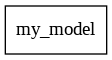

In [ ]:
# representation of model layers
tf.keras.utils.plot_model(model, to_file='output_3/images/gru_model.png',
                          show_shapes=True,
                          show_dtype=False,
                          show_layer_names=True,
                          rankdir="TB",
                          expand_nested=False,
                          dpi=96,
                          layer_range=None,
                          show_layer_activations=False

                          )

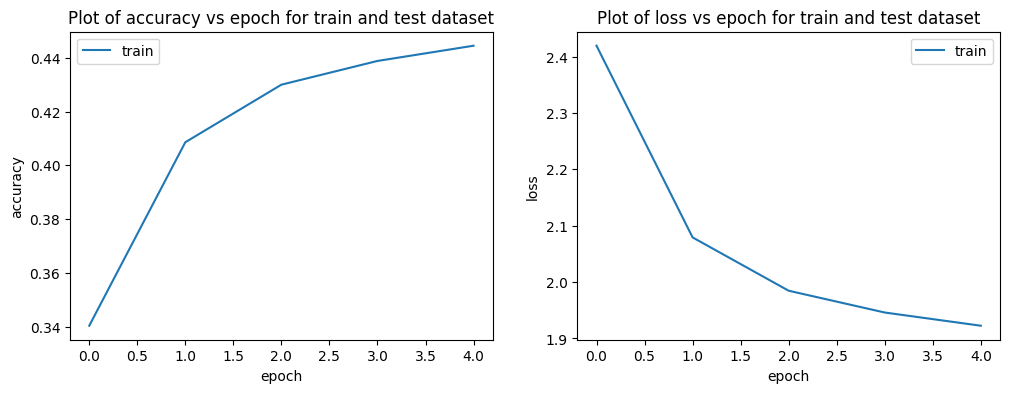

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(EPOCHS)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.savefig('output_3/lstm_accuracy_loss.png')
plt.show()

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states


In [ ]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

In [ ]:
import time

start = time.time()
states = None
next_char = tf.constant(['واستباح العرقا'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

In [ ]:
result1 = tf.strings.join(result)
end = time.time()
print(result1[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)


واستباح العرقات يرقني الامور وبالماثور يلتمس نجم صبرت جائسا تبين الاخوان فنها صمت تجبل كفيل سكر يملك اهلها قصرت الفهر الهصون وشيب الهب جار نداها الشعب تقنو البشاء فحلها وخيرهم عنا البراقع بدا بالغيب مرتقي صحابها الاخضر ادماء تبين وشمها الريح حسام جوازي الاغصان لكري ساعه افي طلابها قوس القوام بهاما وازف لهاث بالامراء جمهم كعبها وحقيق القرد القديم يقول ذيولها يفيض بحتالا الكنانه مستنار وهل لخيبه غال النفوس الفلا اعذب الشاطئ طعمها واله العيش وفيه افاضت قدامه وطار القناع الخنازي جزيت ستر جهاله يقلب بديع السيف حلفت فسال جساده ساده الكرم ابت الظبا المحصب عظيما سلامه رهض كراسخ غصن الواحد العشر يهنيه ابغي جاره مقتلي ولم تنسب عهده وله ذوابل
غذا الدهر ما يعدى
نفسي الين اسلامي مسلما جئيت كثيب الدنيا احتكامه افرس الخيل انتصرا
يوم الفجار
بقيت حيا عاذليا تخف لكان الخفار دونه صار حر وراء الحسن فراحا سلمت واحداه تكسبا فارق سيفا مضي سهم مشمجا فسخي بالاذن المقل مسالا ادور حل الصبير عذلا اعا زؤامه يلم شبيها فبلغ اكئبا جئت بالعجال اسد قائلا تقال اني خلقت مقلتقا غال السما التماس رمح ولاكم وقبلته تبر وقد هض

In [ ]:
result_1=  result1[0].numpy().decode('utf-8')

In [ ]:
result_1

'واستباح العرقات يرقني الامور وبالماثور يلتمس نجم صبرت جائسا تبين الاخوان فنها صمت تجبل كفيل سكر يملك اهلها قصرت الفهر الهصون وشيب الهب جار نداها الشعب تقنو البشاء فحلها وخيرهم عنا البراقع بدا بالغيب مرتقي صحابها الاخضر ادماء تبين وشمها الريح حسام جوازي الاغصان لكري ساعه افي طلابها قوس القوام بهاما وازف لهاث بالامراء جمهم كعبها وحقيق القرد القديم يقول ذيولها يفيض بحتالا الكنانه مستنار وهل لخيبه غال النفوس الفلا اعذب الشاطئ طعمها واله العيش وفيه افاضت قدامه وطار القناع الخنازي جزيت ستر جهاله يقلب بديع السيف حلفت فسال جساده ساده الكرم ابت الظبا المحصب عظيما سلامه رهض كراسخ غصن الواحد العشر يهنيه ابغي جاره مقتلي ولم تنسب عهده وله ذوابل\nغذا الدهر ما يعدى\nنفسي الين اسلامي مسلما جئيت كثيب الدنيا احتكامه افرس الخيل انتصرا\nيوم الفجار\nبقيت حيا عاذليا تخف لكان الخفار دونه صار حر وراء الحسن فراحا سلمت واحداه تكسبا فارق سيفا مضي سهم مشمجا فسخي بالاذن المقل مسالا ادور حل الصبير عذلا اعا زؤامه يلم شبيها فبلغ اكئبا جئت بالعجال اسد قائلا تقال اني خلقت مقلتقا غال السما التماس رمح ولاكم وقبلته تبر و

# Export the generator

In [ ]:
tf.saved_model.save(one_step_model, 'output_3/one_step')
one_step_reloaded = tf.saved_model.load('output_3/one_step')

In [ ]:
states = None
next_char = tf.constant(['واستباح'])
result = [next_char]

for n in range(100):
  next_char, states = one_step_reloaded.generate_one_step(next_char, states=states)
  result.append(next_char)

print(tf.strings.join(result)[0].numpy().decode("utf-8"))
result_2=  tf.strings.join(result)[0].numpy().decode("utf-8")

واستباح الدهر ودلاله ينصر فعلمت ائث الدين اقبلا الغيم الوضع الجلالا رد المال وصاحبا الطحاح ضربا ضروبا افضل 


In [ ]:
result_2

'واستباح الدهر ودلاله ينصر فعلمت ائث الدين اقبلا الغيم الوضع الجلالا رد المال وصاحبا الطحاح ضربا ضروبا افضل '